In [1]:
import pandas as pd
import numpy as np
import pyBigWig as pw


In [71]:

#names = ["chr", "start", "end", "name", "pwm", "strand", "pchr", "pstart", "pend", "tobias", "counts", "profile", "chip", "obs", "label"]
names = ["chr", "start", "end", "name", "pwm", "strand", "pchr", "pstart", "pend", "tobias", "atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "chip", "atac_obs", "dnase_obs"]

cl="HEPG2"
pp="pattern_0_CTCF"
chipenc="ENCSR607XFI"
bed=chipenc+".bed"
#pp="pattern_2_SPI1"
#bed="ENCSR000BGQ.bed"
#pp="pattern_13_POU2F2"
#bed="ENCSR000BGP.bed"

main_dir="/mnt/lab_data2/anusri/chrombpnet/src/evaluation/figure_notebooks/figure_5/chip_seq_compare/new_output_jan_18/"
data = pd.read_csv(main_dir+cl+"/"+pp+"/"+bed, sep='\t', names=names)
data["label"] = True
data = data[data["label"]]

In [3]:
data.shape

(46482, 18)

In [4]:
data.head()

,chr,start,end,name,pwm,strand,pchr,pstart,pend,tobias,atac_counts,atac_profile,dnase_counts,dnase_profile,chip,atac_obs,dnase_obs,label
0,chr1,778893,778907,pos_patterns.pattern_0.CTCF_MA0139.1_pos_patte...,8.10064,+,chr1,778468,779291,0.23778,0.035799,0.007140,0.152529,0.028120,0.329369,1065.0,1775.0,True
1,chr1,869920,869934,pos_patterns.pattern_0.CTCF_MA0139.1_pos_patte...,13.50583,+,chr1,869623,870291,0.18210,0.574448,0.248722,0.428719,0.340244,2.595642,538.0,95.0,True
2,chr1,870036,870050,pos_patterns.pattern_0.CTCF_MA0139.1_pos_patte...,8.24970,-,chr1,869623,870291,0.10453,0.044684,0.000060,-0.001219,0.001309,0.127758,483.0,64.0,True
3,chr1,904288,904302,pos_patterns.pattern_0.CTCF_MA0139.1_pos_patte...,7.61974,+,chr1,903727,904505,0.10879,0.001883,-0.000468,-0.013407,-0.001711,0.004132,378.0,20.0,True
4,chr1,904770,904784,pos_patterns.pattern_0.CTCF_MA0139.1_pos_patte...,13.50583,+,chr1,904619,904912,0.44583,0.226025,0.187580,0.274994,0.208691,1.751892,657.0,127.0,True


In [73]:
#observed="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/"+cl+"/DNASE/"+cl+"_wo_bias.bw"
corrected="/oak/stanford/groups/akundaje/projects/chromatin-atlas-2022/chrombpnet/merged/"+cl+"/ATAC/"+cl+"_wo_bias.bw"
observed="/mnt/lab_data2/anusri/chrombpnet/results/chrombpnet/ATAC_PE/"+cl+"/data/"+cl+"_unstranded.bw"
chip_plus="/oak/stanford/groups/akundaje/vir/tfatlas/processed_data/"+chipenc+"/"+chipenc+"_plus.bigWig"
chip_minus="/oak/stanford/groups/akundaje/vir/tfatlas/processed_data/"+chipenc+"/"+chipenc+"_minus.bigWig"

bw_obs = pw.open(observed)
bw_corr = pw.open(corrected)
bw_cp = pw.open(chip_plus)
bw_cm = pw.open(chip_minus)




In [141]:
observed_vals_chip = []
for i,r in data.iterrows():
    mid = int((r["start"]+r["end"])/2)
    val1 = np.nan_to_num(bw_cp.values(r['chr'],mid-150,mid+150))
    val2 = np.nan_to_num(bw_cm.values(r['chr'],mid-150,mid+150))
    
    if r["strand"]=="-":
        observed_vals_chip.append([val2[::-1]/np.sum(val2), val1[::-1]/np.sum(val1)])
    else:
        observed_vals_chip.append([val1/np.sum(val1), val2/np.sum(val2)])
observed_vals_chip = np.array(observed_vals_chip)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


In [88]:
print(observed_vals_chip.shape)

(46482, 2, 120)


In [98]:
observed_vals_chip[~(np.isnan(observed_vals_chip[:,0,:]) | np.isnan(observed_vals_chip[:,1,:])).any(axis=1)].shape

(45379, 2, 120)

In [114]:
observed_vals = []
for i,r in data.iterrows():
    mid = int((r["start"]+r["end"])/2)
    val1 = np.nan_to_num(bw_obs.values(r['chr'],mid-60,mid+60))
    if r["strand"]=="-":
        observed_vals.append(val1[::-1]/np.sum(val1))
    else:
        observed_vals.append(val1/np.sum(val1))
observed_vals = np.array(observed_vals)

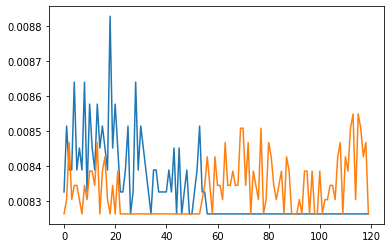

In [139]:
plt.plot((observed_vals_chip[0,0,:]+1)/np.sum(observed_vals_chip[0,0,:]+1))
plt.plot((observed_vals_chip[0,1,:]+1)/np.sum(observed_vals_chip[0,1,:]+1))

In [7]:
corrected_vals = []
for i,r in data.iterrows():
    mid = int((r["start"]+r["end"])/2)
    val1 = np.nan_to_num(bw_corr.values(r['chr'],mid-60,mid+60))
    if r["strand"]=="-":
        corrected_vals.append(val1[::-1]/np.sum(val1))
    else:
        corrected_vals.append(val1/np.sum(val1))
corrected_vals = np.array(corrected_vals)

/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/users/anusri/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


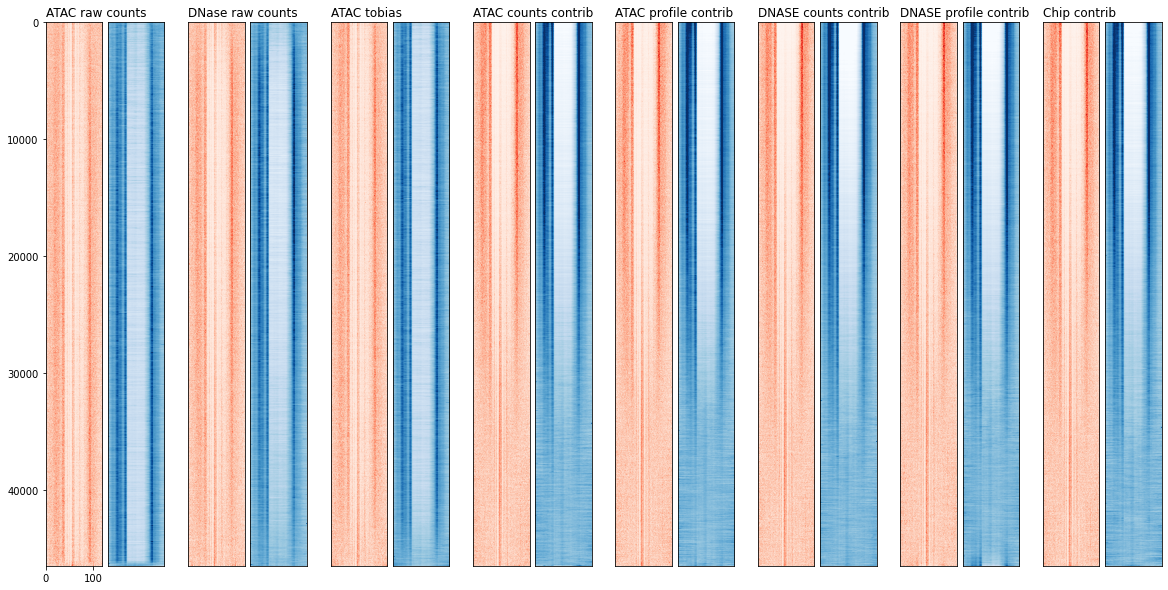

In [47]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as clr
import matplotlib.gridspec as gridspec

names =  ["atac_obs", "dnase_obs", "tobias", "atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "chip"]
labels = ["ATAC raw counts", "DNase raw counts", "ATAC tobias", "ATAC counts contrib","ATAC profile contrib",  "DNASE counts contrib", "DNASE profile contrib", "Chip contrib"]

#no_signals=len(cwm_values)

observed_vals1 = observed_vals[~np.isnan(corrected_vals).any(axis=1)]
vmin, vmax = np.percentile(observed_vals1, [5, 95])

corrected_vals1 = corrected_vals[~np.isnan(corrected_vals).any(axis=1)]
vmin1, vmax1 = np.percentile(corrected_vals1, [5, 95])


fig = plt.figure(figsize=(20, 10))
outer = gridspec.GridSpec(1, 8, wspace=0.2, hspace=0.2)

for i in range(8):
    inner = gridspec.GridSpecFromSubplotSpec(1, 2,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

        
    j=0
    ax = plt.Subplot(fig, inner[j])
    temp=data[names[i]].values[~np.isnan(corrected_vals).any(axis=1)]
    index=np.argsort(temp)[::-1][:temp.shape[0]]
    cmap="Reds"
    im1 = ax.imshow(observed_vals1[index],cmap=cmap,aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
    ax.set_title(labels[i],loc='left')
    if i==0 and j==0:
        pass
    else:
        ax.set_xticks([])
        ax.set_yticks([]) 
    fig.add_subplot(ax)
    
    j=1
    ax = plt.Subplot(fig, inner[j])
    cmap="Blues"
    im1 = ax.imshow(corrected_vals1[index],cmap=cmap,aspect="auto",norm=mpl.colors.Normalize(vmin=vmin1, vmax=vmax1))
    #ax.set_title(labels[i])
    if i==0 and j==0:
        pass
    else:
        ax.set_xticks([])
        ax.set_yticks([]) 
    fig.add_subplot(ax)

fig.show()

Text(0.5, 1.0, 'Chip contrib')

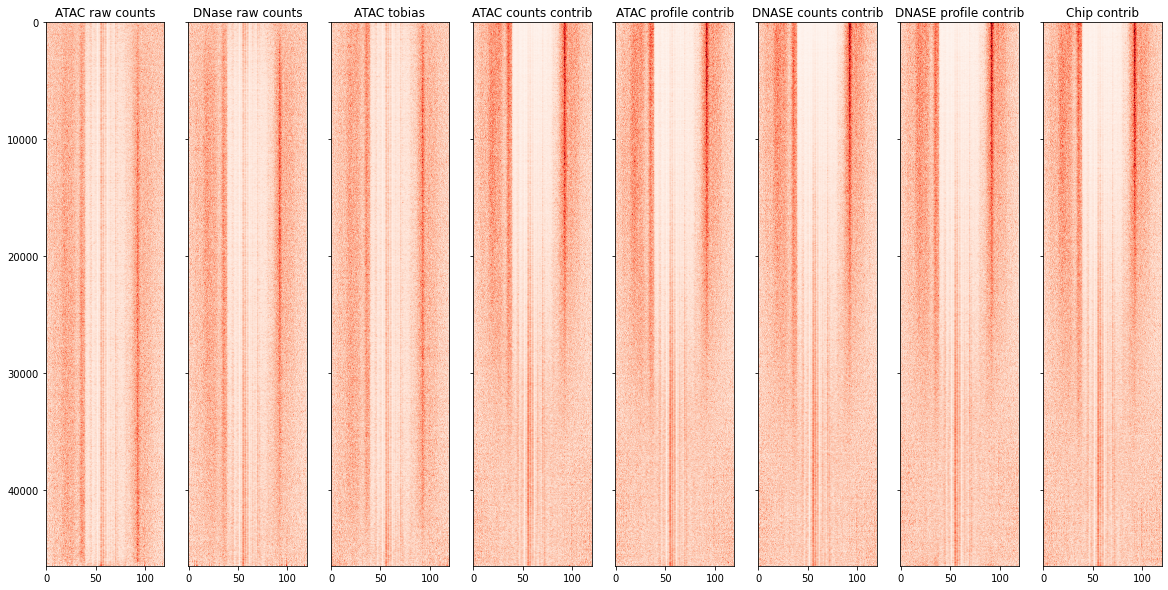

In [66]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as clr
#no_signals=len(cwm_values)
fig,ax = plt.subplots(1,8 ,figsize = (20, 10), gridspec_kw={'width_ratios': [4, 4,  4, 4, 4, 4, 4, 4]}, sharey=True, sharex=True)

observed_vals1 = observed_vals[~np.isnan(observed_vals).any(axis=1)]
maxv = np.max(observed_vals)

vmin, vmax = np.percentile(observed_vals1, [5, 95])

cmap = clr.LinearSegmentedColormap.from_list('custom green', ['#FFFFFF','#5FB4EF'], N=10)
temp=data["atac_obs"].values[~np.isnan(observed_vals).any(axis=1)]
index=np.argsort(temp)[::-1][:temp.shape[0]]
cmap="Reds"
im1 = ax[0].imshow(observed_vals1[index],cmap=cmap,aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax[0].set_title("ATAC raw counts")

cmap = clr.LinearSegmentedColormap.from_list('custom green', ['#FFFFFF','#249AEC'], N=10)
temp=data["dnase_obs"].values[~np.isnan(observed_vals).any(axis=1)]
index=np.argsort(temp)[::-1][:temp.shape[0]]
cmap="Reds"
im1 = ax[1].imshow(observed_vals1[index],cmap=cmap,aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax[1].set_title("DNase raw counts")

# temp=data["pwm"].values[~np.isnan(observed_vals).any(axis=1)]
# index=np.argsort(temp)[::-1][:temp.shape[0]]
# im1 = ax[2].imshow(observed_vals1[index],cmap="Reds",aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
# ax[2].set_title("PWM")

cmap = clr.LinearSegmentedColormap.from_list('custom green', ['#FFFFFF','#ABABAB'], N=10)
temp=data["tobias"].values[~np.isnan(observed_vals).any(axis=1)]
index=np.argsort(temp)[::-1][:temp.shape[0]]
cmap="Reds"
im1 = ax[2].imshow(observed_vals1[index],cmap=cmap,aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax[2].set_title("ATAC tobias")

cmap = clr.LinearSegmentedColormap.from_list('custom green', ['#FFFFFF','#7EAD84'], N=10)
temp=data["atac_counts"].values[~np.isnan(observed_vals).any(axis=1)]
index=np.argsort(temp)[::-1][:temp.shape[0]]
cmap="Reds"
im1 = ax[3].imshow(observed_vals1[index],cmap=cmap ,aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax[3].set_title("ATAC counts contrib")

cmap = clr.LinearSegmentedColormap.from_list('custom green', ['#FFFFFF','#3D963D'], N=10)
temp=data["atac_profile"].values[~np.isnan(observed_vals).any(axis=1)]
index=np.argsort(temp)[::-1][:temp.shape[0]]
#index=np.argsort(data["atac_profile"].values)[::-1][:data["atac_profile"].shape[0]]
cmap="Reds"
im1 = ax[4].imshow(observed_vals1[index],cmap=cmap,aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax[4].set_title("ATAC profile contrib")

cmap = clr.LinearSegmentedColormap.from_list('custom green', ['#FFFFFF','#B95BD0'], N=10)
temp=data["dnase_counts"].values[~np.isnan(observed_vals).any(axis=1)]
index=np.argsort(temp)[::-1][:temp.shape[0]]
cmap="Reds"
im1 = ax[5].imshow(observed_vals1[index],cmap=cmap,aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax[5].set_title("DNASE counts contrib")

cmap = clr.LinearSegmentedColormap.from_list('custom green', ['#FFFFFF','#9B4CAF'], N=10)
temp=data["dnase_profile"].values[~np.isnan(observed_vals).any(axis=1)]
index=np.argsort(temp)[::-1][:temp.shape[0]]
cmap="Reds"
#index=np.argsort(data["atac_profile"].values)[::-1][:data["atac_profile"].shape[0]]
im1 = ax[6].imshow(observed_vals1[index],cmap=cmap,aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax[6].set_title("DNASE profile contrib")


temp=data["chip"].values[~np.isnan(observed_vals).any(axis=1)]
index=np.argsort(temp)[::-1][:temp.shape[0]]
#index=np.argsort(data["chip"].values)[::-1][:data["chip"].shape[0]]
im1 = ax[7].imshow(observed_vals1[index],cmap="Reds",aspect="auto",norm=mpl.colors.Normalize(vmin=vmin, vmax=vmax))
ax[7].set_title("Chip contrib")

#plt.savefig("ctcf_hepg_occupancy_plot.pdf", dpi=300, transparent=True)



In [142]:
wn=2000
observed_vals1 = np.array(observed_vals1)

names =  ["atac_obs", "dnase_obs", "tobias", "atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "chip"]
labels = ["ATAC raw counts", "DNase raw counts", "ATAC tobias", "ATAC counts contrib","ATAC profile contrib",  "DNASE counts contrib", "DNASE profile contrib", "Chip contrib"]

ndds= [] 

for i in range(len(names)): 
    temp=data[names[i]].values[~np.isnan(corrected_vals).any(axis=1)]
    index=np.argsort(temp)[::-1][:temp.shape[0]]
    ndd = observed_vals1[index]
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(ndd,wn,axis=0)[0::wn],axis=-1)
    ndds.append(ndd0)

ndds_corr = []
for i in range(len(names)): 
    temp=data[names[i]].values[~np.isnan(corrected_vals).any(axis=1)]
    index=np.argsort(temp)[::-1][:temp.shape[0]]
    ndd = corrected_vals1[index]
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(ndd,wn,axis=0)[0::wn],axis=-1)
    ndds_corr.append(ndd0)
    
observed_vals_chip1 = observed_vals_chip[~(np.isnan(observed_vals_chip[:,0,:]) | np.isnan(observed_vals_chip[:,1,:])).any(axis=1)]

ndds_chip_p = []
ndds_chip_m = []
for i in range(len(names)): 
    temp=data[names[i]].values[~(np.isnan(observed_vals_chip[:,0,:]) | np.isnan(observed_vals_chip[:,1,:])).any(axis=1)]
    index=np.argsort(temp)[::-1][:temp.shape[0]]
    ndd = observed_vals_chip1[index]
    print(np.squeeze(ndd[:,0,:]).shape)
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(np.squeeze(ndd[:,0,:]),wn,axis=0)[0::wn],axis=-1)
    ndds_chip_p.append(np.squeeze(ndd0))
    ndd0 = np.mean(np.lib.stride_tricks.sliding_window_view(np.squeeze(ndd[:,1,:]),wn,axis=0)[0::wn],axis=-1)
    ndds_chip_m.append(np.squeeze(ndd0))

(46377, 300)
(46377, 300)
(46377, 300)
(46377, 300)
(46377, 300)
(46377, 300)
(46377, 300)
(46377, 300)


In [132]:
#print(np.lib.stride_tricks.sliding_window_view(np.squeeze(ndd[:,0,:]),wn,axis=0)[0::wn])
print(sum(np.isnan(ndd[:,0,:])))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [127]:
print(np.lib.stride_tricks.sliding_window_view(np.squeeze(ndd[:,0,:]),wn,axis=0).shape)

(43380, 120, 2000)


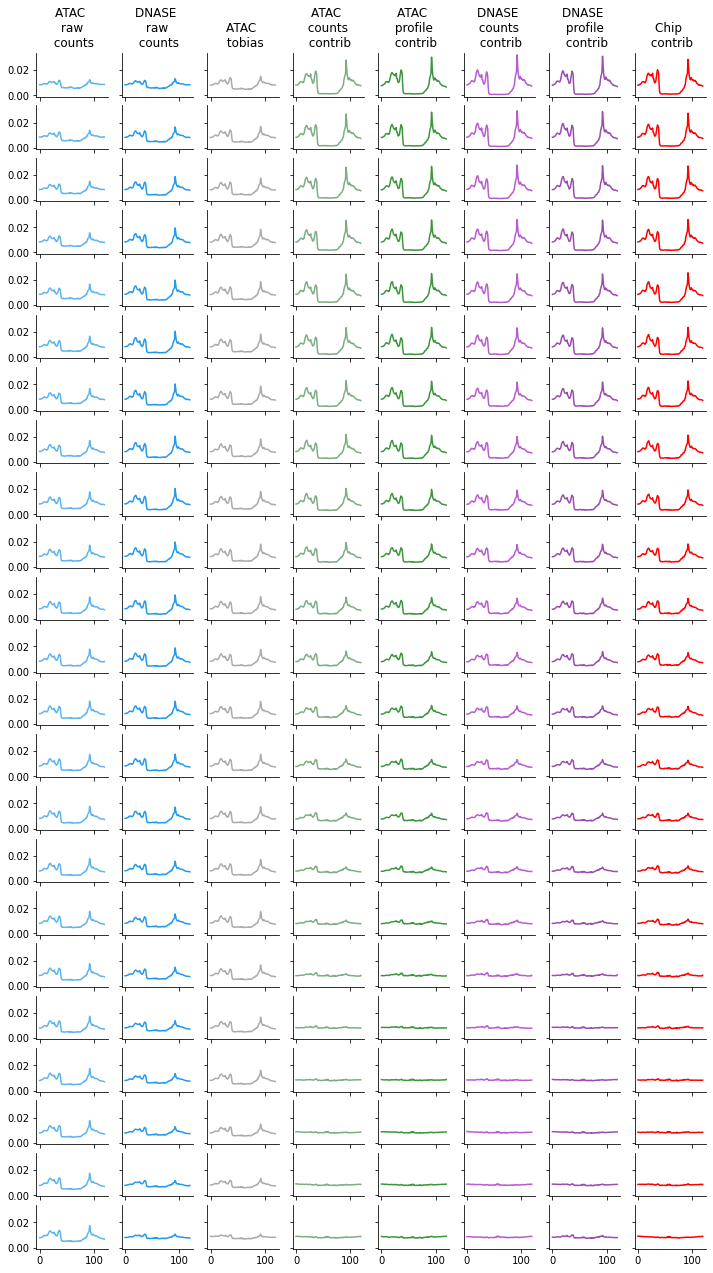

In [49]:

f, ax = plt.subplots(nrows=ndds[0].shape[0], ncols=8,figsize=(12,22), sharey=True, sharex=True)


colrs = ["#5FB4EF", "#249AEC", "#ABABAB", "#7EAD84", "#3D963D", "#B95BD0", "#9B4CAF", "red"]
for i in range(ndds[0].shape[0]):
    for j in range(len(ndds)):
        ax[i,j].plot(ndds_corr[j][i], color=colrs[j])
        ax[i,j].spines[['right', 'top']].set_visible(False)

cols = ["ATAC \n raw \n counts", "DNASE \n raw \n counts", "ATAC \n tobias", "ATAC \n counts \n contrib", "ATAC \n profile \n contrib", "DNASE \n counts \n contrib", "DNASE \n profile \n contrib", "Chip \n contrib"]
for ax1, col in zip(ax[0], cols):
    ax1.set_title(col)
    
#plt.savefig("ctcf_hepg_occupancy_plot_2.pdf", dpi=300, transparent=True)


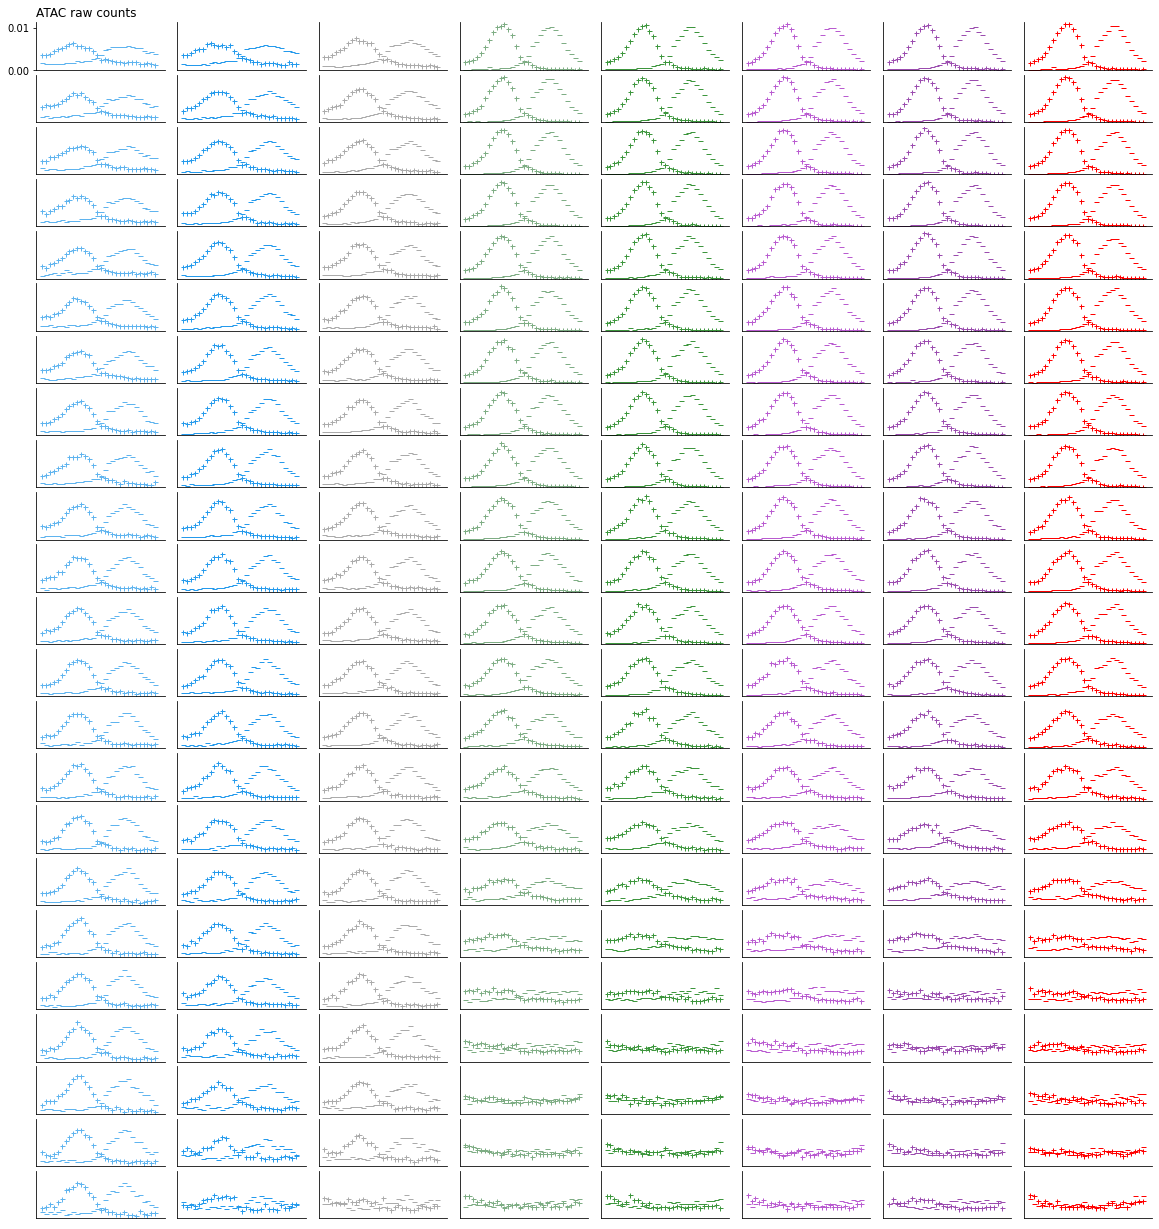

In [175]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as clr
import matplotlib.gridspec as gridspec

names =  ["atac_obs", "dnase_obs", "tobias", "atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "chip"]
labels = ["ATAC raw counts", "DNase raw counts", "ATAC tobias", "ATAC counts contrib","ATAC profile contrib",  "DNASE counts contrib", "DNASE profile contrib", "Chip contrib"]

#no_signals=len(cwm_values)

observed_vals1 = observed_vals[~np.isnan(corrected_vals).any(axis=1)]
vmin, vmax = np.percentile(observed_vals1, [5, 95])

corrected_vals1 = corrected_vals[~np.isnan(corrected_vals).any(axis=1)]
vmin1, vmax1 = np.percentile(corrected_vals1, [5, 95])


fig = plt.figure(figsize=(20, 22))
outer = gridspec.GridSpec(ndds[0].shape[0], 8, wspace=0.1, hspace=0.1)

for j in range(ndds[0].shape[0]):
    #print(j)
    for i in range(8):
        inner = gridspec.GridSpecFromSubplotSpec(1, 1,
                        subplot_spec=outer[8*j+i], wspace=0.2, hspace=0.1)

        #print(i)
        k=0
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds_chip_p[i][j], '+', markevery=(0,10), ms=5, rasterized=True, color=colrs[i], linewidth=2.5)
        ax.plot(ndds_chip_m[i][j], '_', markevery=(0,10), ms=5, color=colrs[i],  linewidth=2.5)

        ax.spines[['right', 'top']].set_visible(False)
        #ax.set_xlim([0, 100])
        ax.set_ylim([0, np.amax([ndds_chip_p, ndds_chip_m])])
        ax.set_xticks([])
        if i==0 and j==0:
            ax.set_title(labels[i],loc='left')
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)

#         k=1
#         ax = plt.Subplot(fig, inner[k])
#         ax.plot(ndds_corr[i][j], color=colrs[i])
#         ax.spines[['right', 'top']].set_visible(False)
#         ax.set_ylim([0, np.ax(ndds_corr)])
#         ax.set_xticks([])
#         #ax.set_yticks([])
#         if i==0 and j==0:
#             ax.set_title(labels[i],loc='left')
#             pass
#         else:
#             ax.set_yticks([]) 
#         fig.add_subplot(ax)

fig.show()

In [163]:
len(ndds_chip_p[0])

23

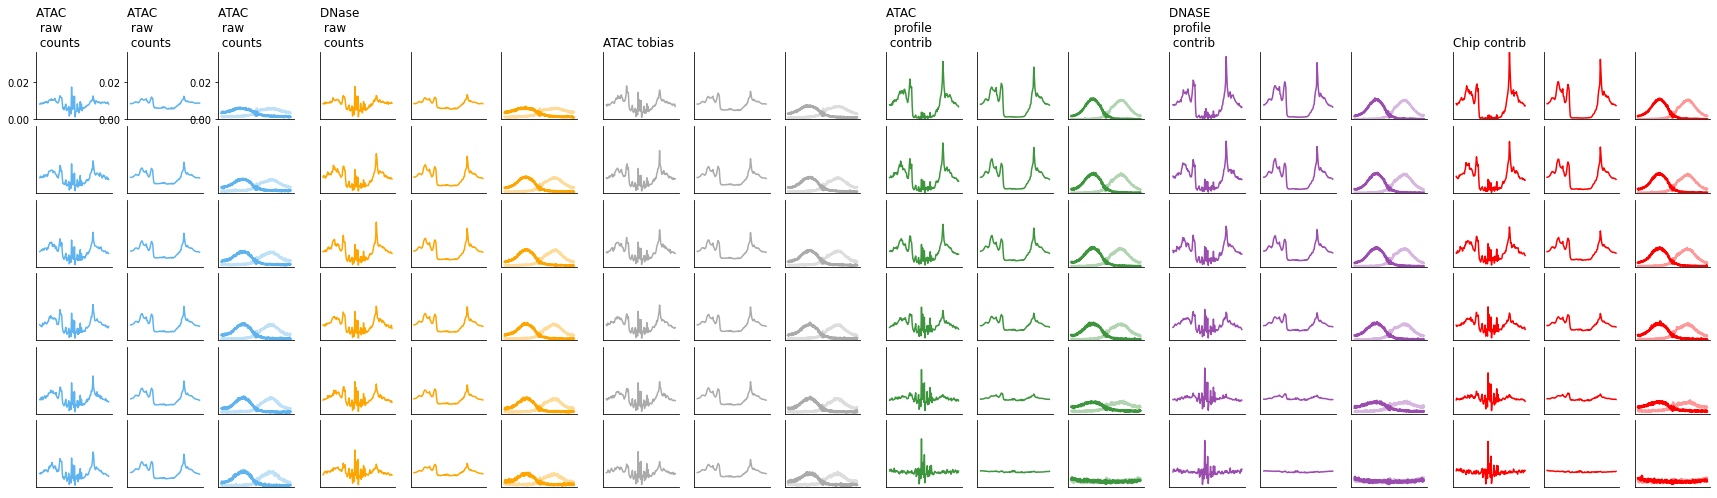

In [190]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42 

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as clr
import matplotlib.gridspec as gridspec

# names =  ["atac_obs", "dnase_obs", "tobias", "atac_counts", "atac_profile", "dnase_counts", "dnase_profile", "chip"]
# labels = ["ATAC \n raw \n counts", "DNase \n raw \n counts", "ATAC tobias", "ATAC \n counts \n contrib","ATAC \n  profile \n contrib",  "DNASE \n counts \n contrib", "DNASE \n profile \n contrib", "Chip contrib"]

names =  ["atac_obs", "dnase_obs", "tobias",  "atac_profile", "dnase_profile", "chip"]
labels = ["ATAC \n raw \n counts", "DNase \n raw \n counts", "ATAC tobias","ATAC \n  profile \n contrib",  "DNASE \n profile \n contrib", "Chip contrib"]

#no_signals=len(cwm_values)

observed_vals1 = observed_vals[~np.isnan(corrected_vals).any(axis=1)]
vmin, vmax = np.percentile(observed_vals1, [5, 95])

corrected_vals1 = corrected_vals[~np.isnan(corrected_vals).any(axis=1)]
vmin1, vmax1 = np.percentile(corrected_vals1, [5, 95])

colrs = ["#5FB4EF", "orange", "#ABABAB", "#3D963D", "#9B4CAF", "red"]


fig = plt.figure(figsize=(30, 8))
outer = gridspec.GridSpec(6, len(names), wspace=0.1, hspace=0.1)

for j in range(6):
    #print(j)
    for i in range(len(names)):
        inner = gridspec.GridSpecFromSubplotSpec(1, 3,
                        subplot_spec=outer[len(names)*j+i], wspace=0.2, hspace=0.1)

        #print(i)
        k=0
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds[i][4*j], color=colrs[i])
        ax.spines[['right', 'top']].set_visible(False)
        #ax.set_xlim([0, 100])
        ax.set_ylim([0, np.max(ndds)])
        if j==0:
            ax.set_title(labels[i],loc='left')
        ax.set_xticks([])
        if i==0 and j==0:
            
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)

        k=1
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds_corr[i][4*j], color=colrs[i])
        ax.spines[['right', 'top']].set_visible(False)
        ax.set_ylim([0, np.max(ndds)])
        ax.set_xticks([])
        #ax.set_yticks([])
        if i==0 and j==0:
            ax.set_title(labels[i],loc='left')
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)
        
        k=2
        ax = plt.Subplot(fig, inner[k])
        ax.plot(ndds_chip_p[i][4*j], '-', markevery=(0,8), ms=5, rasterized=True, color=colrs[i], linewidth=2.5)
        ax.plot(ndds_chip_m[i][4*j], '-', markevery=(0,8), ms=5, color=colrs[i],  linewidth=2.5, alpha=0.4)
        ax.spines[['right', 'top']].set_visible(False)
        ax.set_ylim([0, np.max(ndds)])
        ax.set_xticks([])
        #ax.set_yticks([])
        if i==0 and j==0:
            ax.set_title(labels[i],loc='left')
            pass
        else:
            ax.set_yticks([]) 
        fig.add_subplot(ax)
        
fig.show()

In [61]:
print(ndds[0].shape[0])

23


In [86]:
np.min(ndds_chip_p)

nan

In [87]:
ndds_chip_p

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..

In [105]:
ndds_chip_p

[array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ..